In [ ]:
from google.colab import files
files.upload()

In [2]:
!unzip -qq "house-prices-advanced-regression-techniques.zip"

In [82]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

회귀분석 복습을 위해 간단하게 풀어보기
--

Train
--

In [14]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Test
--

In [17]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [19]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Sample_Submission
--

In [20]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


결측치 확인
--

In [53]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [58]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

결측치 제거
--

In [83]:
train=train.dropna(axis=1)

In [84]:
test=test.dropna(axis=1)

Label Encoder
--

In [85]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [86]:
for i in range(0,62):
    name=train.columns[i]
    if type(train.iloc[0, i])==str:
        train[name]=le.fit_transform(train[name])
    else:
        pass

In [87]:
for i in range(0,47):
    name=test.columns[i]
    if type(test.iloc[0, i])==str:
        test[name]=le.fit_transform(test[name])
    else:
        pass

Simple EDA
--

train, test 칼럼 맞춰주기

In [88]:
train.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,2.539726,3.733562,1.396575,443.639726,46.549315,567.240411,1057.429452,1.036301,1.538356,0.934932,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.339726,6.517808,5.749315,0.613014,1.767123,472.980137,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.693995,0.731807,0.722394,456.098091,161.319273,441.866955,438.705324,0.295124,1.739524,0.246731,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.830161,1.625393,0.979659,0.644666,0.747315,213.804841,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1954.000000,1967.000000,1.000000,1.000000,8.000000,8.000000,2.000000,4.000000,1.000000,0.000000,0.000000,223.000000,795.750000,1.000000,0.000000,1.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.000000,6.000000,0.000000,1.000000,334.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,12.000000,2.000000,2.000000,0.000000,2.000000,6.000000,5.000000,1973.000000,1994.000000,1.000000,1.000000,12.000

In [97]:
test

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,1,3,3,4,0,12,1,2,0,2,5,6,1961,1961,1,0,3,4,1,0,4,1,3,896,0,0,896,1,0,2,1,5,0,2,140,0,0,0,120,0,0,6,2010,4
1,1462,20,14267,1,0,3,0,0,12,2,2,0,2,6,6,1958,1958,3,0,3,4,1,0,4,1,3,1329,0,0,1329,1,1,3,1,6,0,2,393,36,0,0,0,0,12500,6,2010,4
2,1463,60,13830,1,0,3,4,0,8,2,2,0,4,5,5,1997,1998,1,0,3,4,2,0,2,1,3,928,701,0,1629,2,1,3,1,6,1,2,212,34,0,0,0,0,0,3,2010,4
3,1464,60,9978,1,0,3,4,0,8,2,2,0,4,6,6,1998,1998,1,0,3,4,2,0,0,1,3,926,678,0,1604,2,1,3,1,7,1,2,360,36,0,0,0,0,0,6,2010,4
4,1465,120,5005,1,0,1,4,0,22,2,2,4,2,8,5,1992,1992,1,0,2,4,2,0,0,1,3,1280,0,0,1280,2,0,2,1,5,0,2,0,82,0,0,144,0,0,1,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,1,3,3,4,0,10,2,2,3,4,4,7,1970,1970,1,0,3,4,1,0,2,1,3,546,546,0,1092,1,1,3,1,5,0,2,0,0,0,0,0,0,0,6,2006,4
1455,2916,160,1894,1,3,3,4,0,10,2,2,4,4,4,5,1970,1970,1,0,3,4,1,0,4,1,3,546,546,0,1092,1,1,3,1,6,0,2,0,24,0,0,0,0,0,4,2006,0
1456,2917,20,20000,1,3,3,4,0,11,2,2,0,2,5,7,1960,1996,1,0,3,4,1,0,0,1,3,1224,0,0,1224,1,0,4,1,7,1,2,474,0,0,0,0,0,0,9,2006,0
1457,2918,85,10441,1,3,3,4,0,11,2,2,0,5,5,5,1992,1992,1,0,3,4,2,0,4,1,3,970,0,0,970,1,0,3,1,6,0,2,80,32,0,0,0,0,700,7,2006,4


In [93]:
y=train[['SalePrice']]

In [94]:
import warnings
warnings.filterwarnings('ignore')

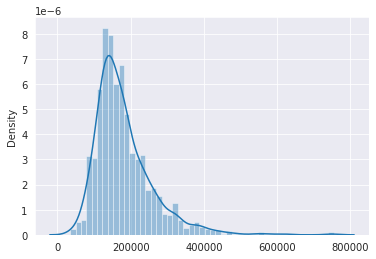

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.distplot(y)

In [98]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [99]:
test.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [101]:
train=train[['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition','SalePrice']]

In [102]:
test=test[['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition']]

In [103]:
train

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,8450,1,3,3,4,0,5,2,2,0,5,7,5,2003,2003,1,1,2,4,2,1,0,1,856,854,0,1710,2,1,3,1,8,0,2,0,61,0,0,0,0,0,2,2008,4,208500
1,2,20,9600,1,3,3,2,0,24,1,2,0,2,6,8,1976,1976,1,1,3,4,1,1,0,1,1262,0,0,1262,2,0,3,1,6,1,2,298,0,0,0,0,0,0,5,2007,4,181500
2,3,60,11250,1,0,3,4,0,5,2,2,0,5,7,5,2001,2002,1,1,2,4,2,1,0,1,920,866,0,1786,2,1,3,1,6,1,2,0,42,0,0,0,0,0,9,2008,4,223500
3,4,70,9550,1,0,3,0,0,6,2,2,0,5,7,5,1915,1970,1,1,3,4,0,1,2,1,961,756,0,1717,1,0,3,1,7,1,2,0,35,272,0,0,0,0,2,2006,0,140000
4,5,60,14260,1,0,3,2,0,15,2,2,0,5,8,5,2000,2000,1,1,2,4,2,1,0,1,1145,1053,0,2198,2,1,4,1,9,1,2,192,84,0,0,0,0,0,12,2008,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,1,3,3,4,0,8,2,2,0,5,6,5,1999,2000,1,1,3,4,2,1,0,1,953,694,0,1647,2,1,3,1,7,1,2,0,40,0,0,0,0,0,8,2007,4,175000
1456,1457,20,13175,1,3,3,4,0,14,2,2,0,2,6,6,1978,1988,1,1,3,4,1,1,4,1,2073,0,0,2073,2,0,3,1,7,2,2,349,0,0,0,0,0,0,2,2010,4,210000
1457,1458,70,9042,1,3,3,4,0,6,2,2,0,5,7,9,1941,2006,1,1,0,2,4,1,0,1,1188,1152,0,2340,2,0,4,1,9,2,2,0,60,0,0,0,0,2500,5,2010,4,266500
1458,1459,20,9717,1,3,3,4,0,12,2,2,0,2,5,6,1950,1996,3,1,3,4,1,1,2,1,1078,0,0,1078,1,0,2,1,5,0,2,366,0,112,0,0,0,0,4,2010,4,142125


In [104]:
test

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,1,3,3,4,0,12,1,2,0,2,5,6,1961,1961,1,0,3,4,1,0,4,1,896,0,0,896,1,0,2,1,5,0,2,140,0,0,0,120,0,0,6,2010,4
1,1462,20,14267,1,0,3,0,0,12,2,2,0,2,6,6,1958,1958,3,0,3,4,1,0,4,1,1329,0,0,1329,1,1,3,1,6,0,2,393,36,0,0,0,0,12500,6,2010,4
2,1463,60,13830,1,0,3,4,0,8,2,2,0,4,5,5,1997,1998,1,0,3,4,2,0,2,1,928,701,0,1629,2,1,3,1,6,1,2,212,34,0,0,0,0,0,3,2010,4
3,1464,60,9978,1,0,3,4,0,8,2,2,0,4,6,6,1998,1998,1,0,3,4,2,0,0,1,926,678,0,1604,2,1,3,1,7,1,2,360,36,0,0,0,0,0,6,2010,4
4,1465,120,5005,1,0,1,4,0,22,2,2,4,2,8,5,1992,1992,1,0,2,4,2,0,0,1,1280,0,0,1280,2,0,2,1,5,0,2,0,82,0,0,144,0,0,1,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,1,3,3,4,0,10,2,2,3,4,4,7,1970,1970,1,0,3,4,1,0,2,1,546,546,0,1092,1,1,3,1,5,0,2,0,0,0,0,0,0,0,6,2006,4
1455,2916,160,1894,1,3,3,4,0,10,2,2,4,4,4,5,1970,1970,1,0,3,4,1,0,4,1,546,546,0,1092,1,1,3,1,6,0,2,0,24,0,0,0,0,0,4,2006,0
1456,2917,20,20000,1,3,3,4,0,11,2,2,0,2,5,7,1960,1996,1,0,3,4,1,0,0,1,1224,0,0,1224,1,0,4,1,7,1,2,474,0,0,0,0,0,0,9,2006,0
1457,2918,85,10441,1,3,3,4,0,11,2,2,0,5,5,5,1992,1992,1,0,3,4,2,0,4,1,970,0,0,970,1,0,3,1,6,0,2,80,32,0,0,0,0,700,7,2006,4


데이터 분포 확인

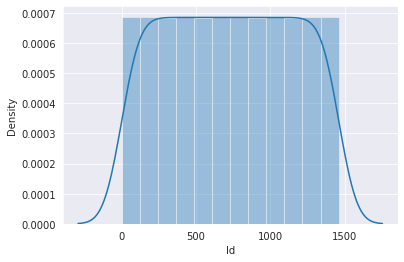

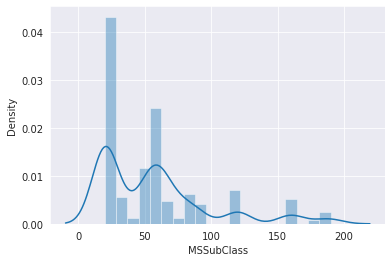

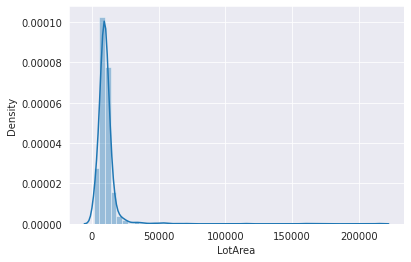

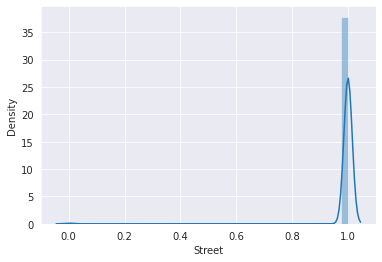

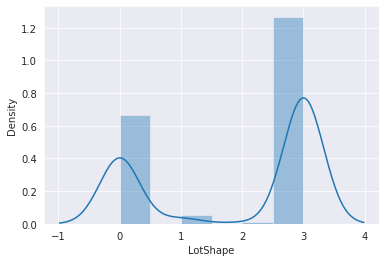

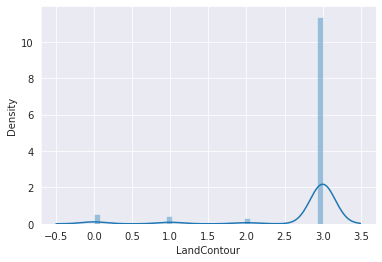

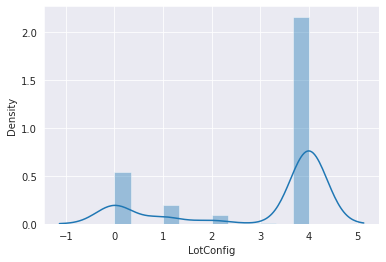

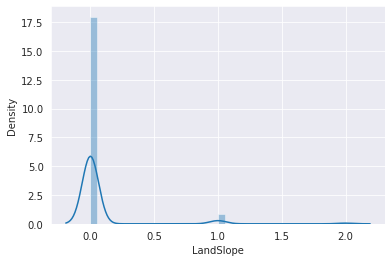

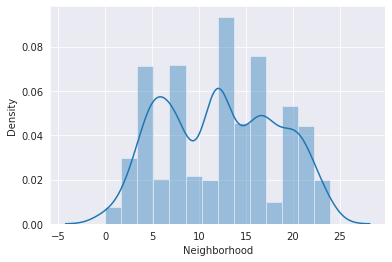

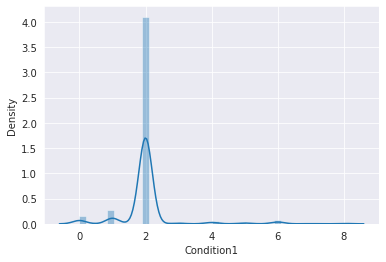

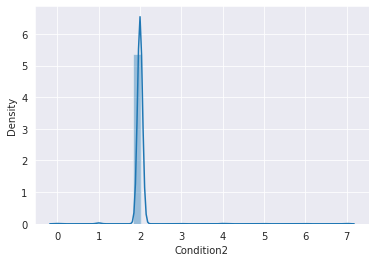

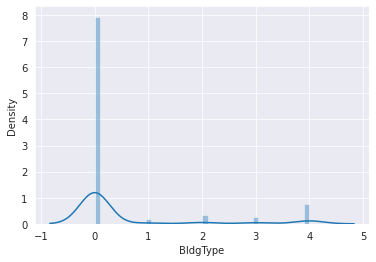

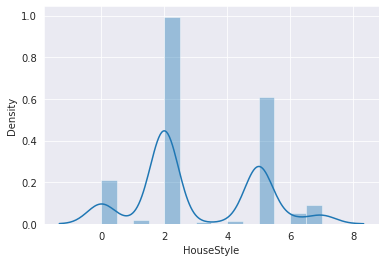

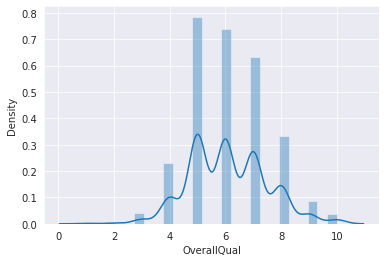

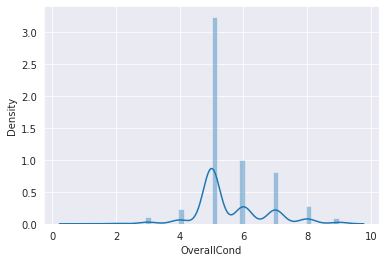

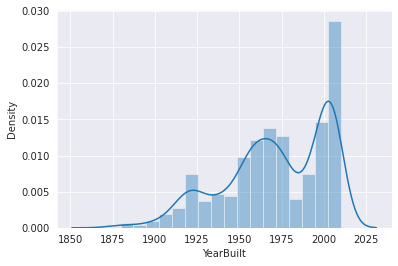

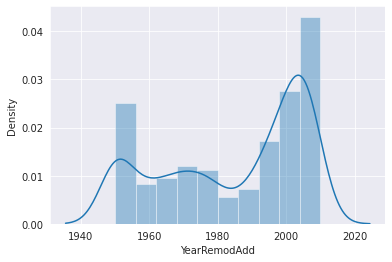

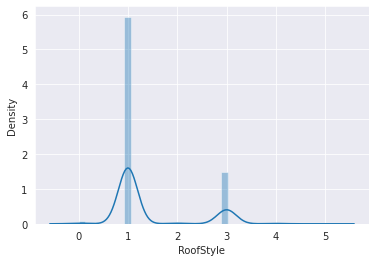

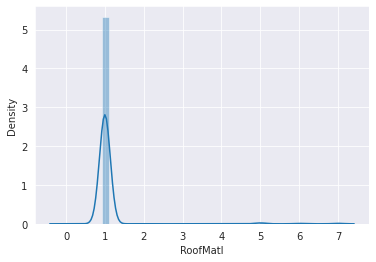

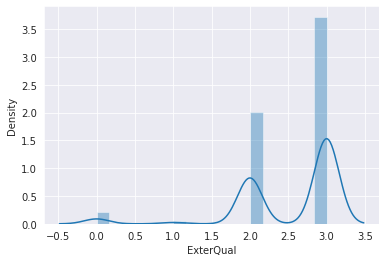

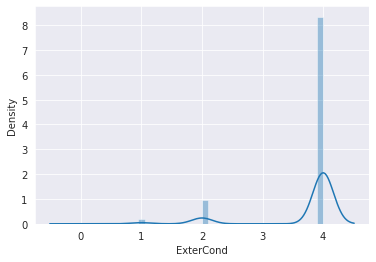

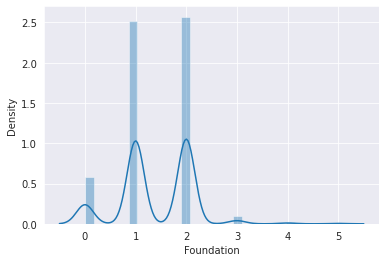

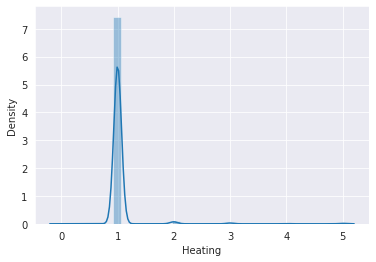

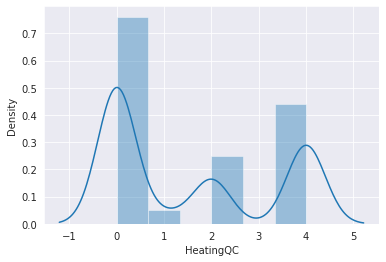

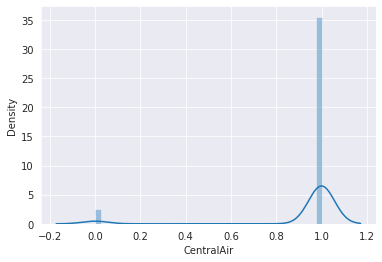

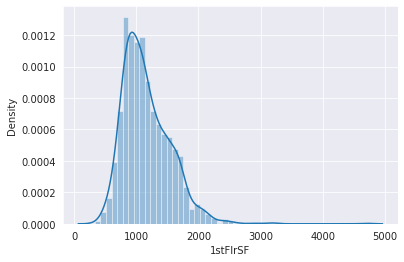

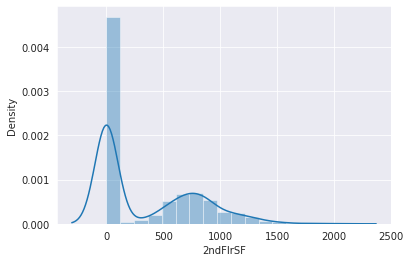

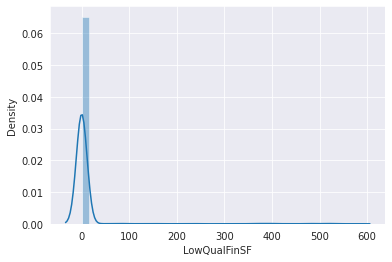

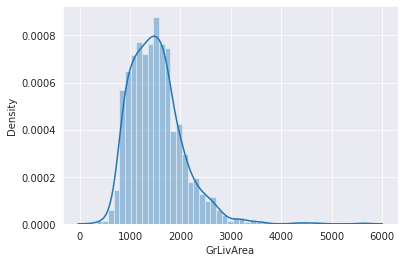

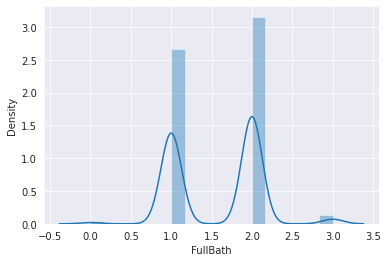

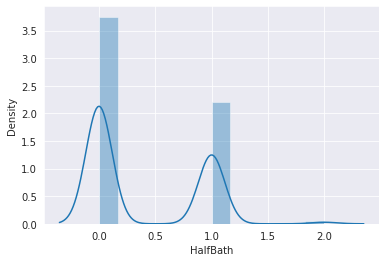

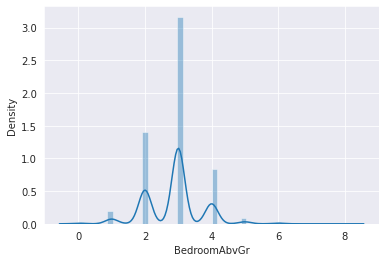

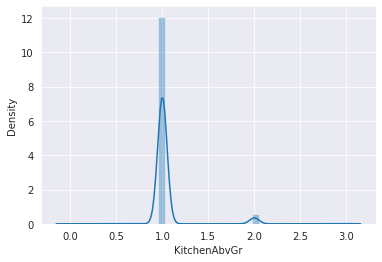

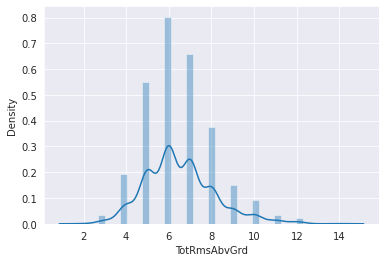

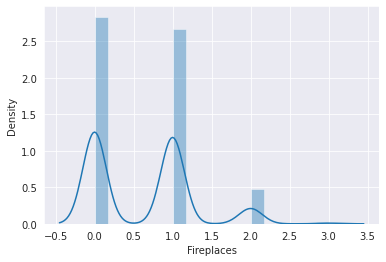

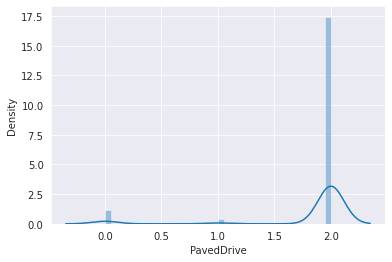

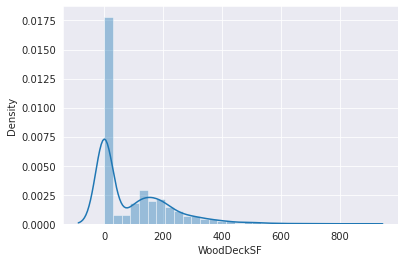

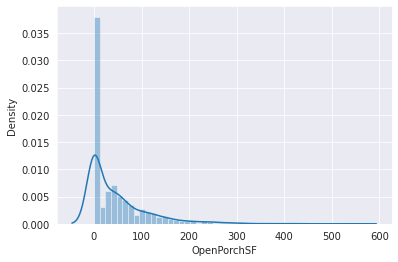

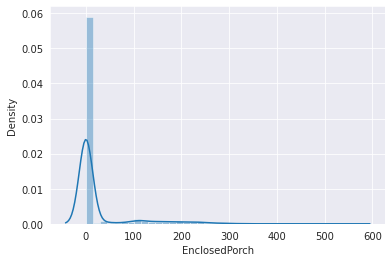

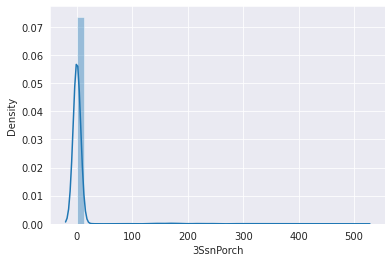

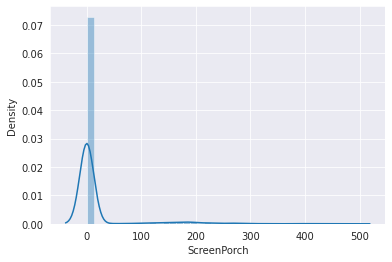

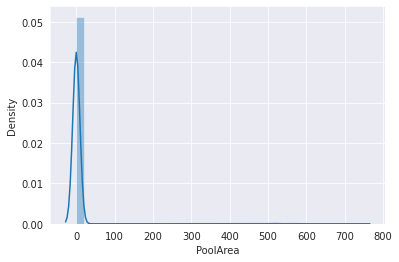

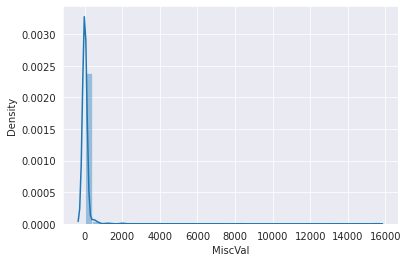

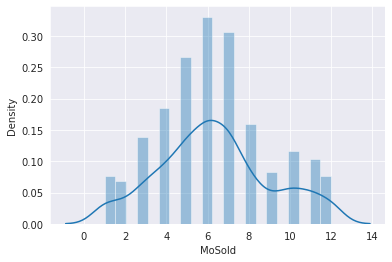

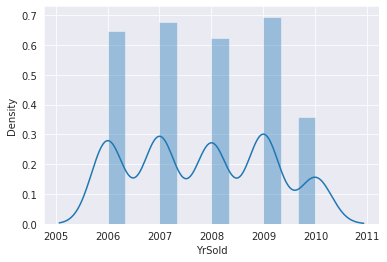

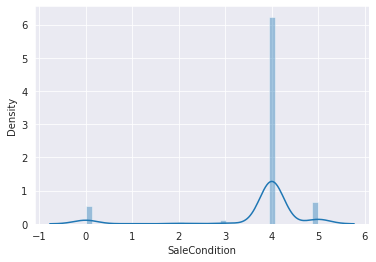

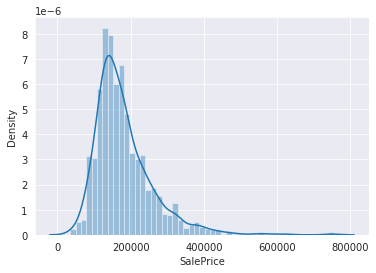

In [106]:
for i in range(0,47):
    name=train.columns[i]
    sns.distplot(train[name])
    plt.show()
    i+=1

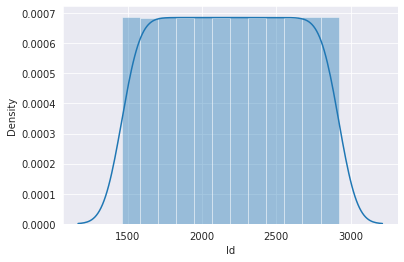

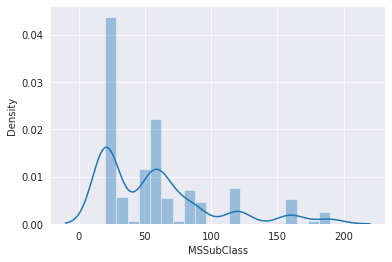

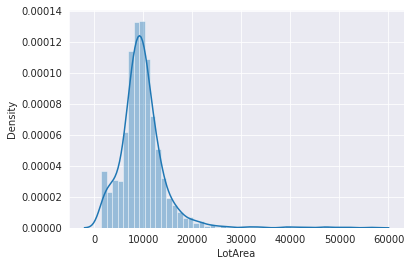

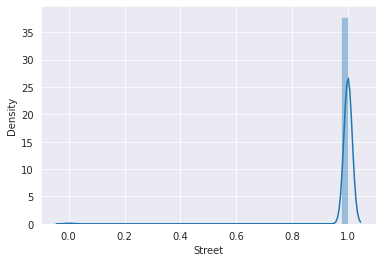

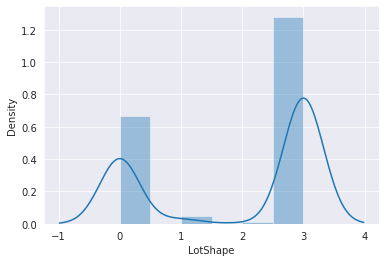

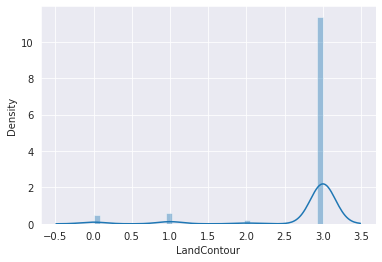

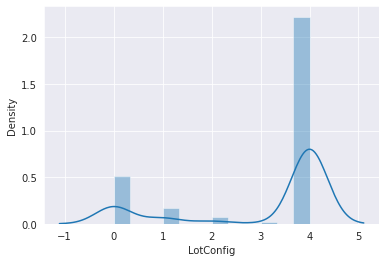

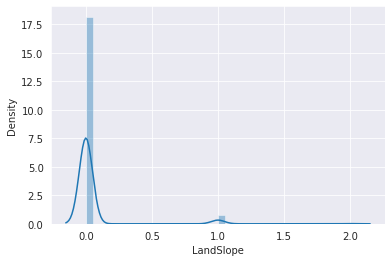

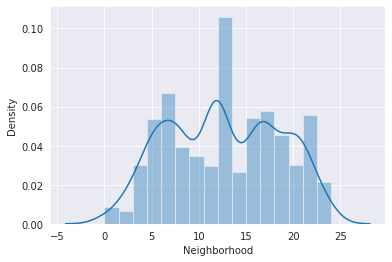

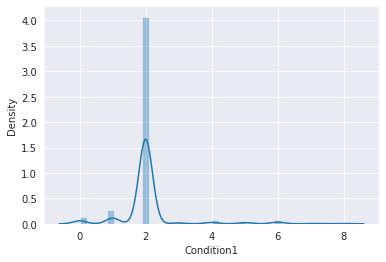

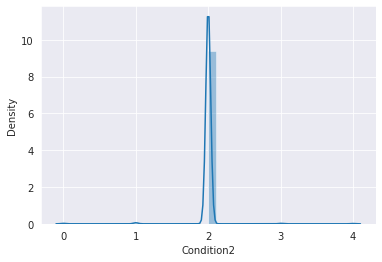

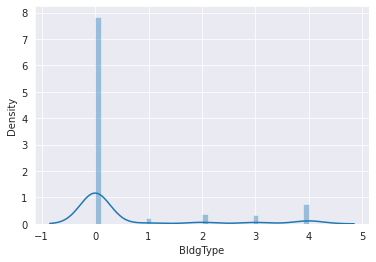

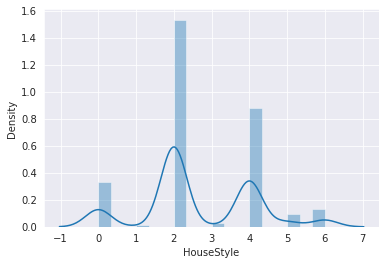

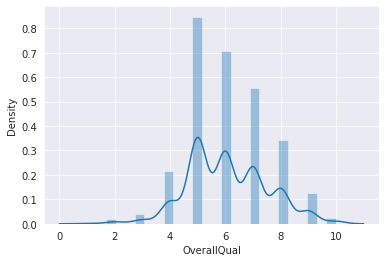

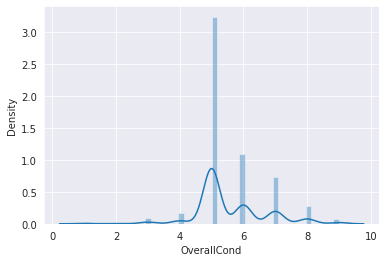

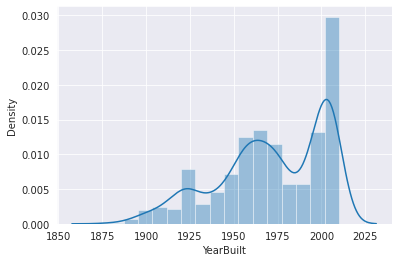

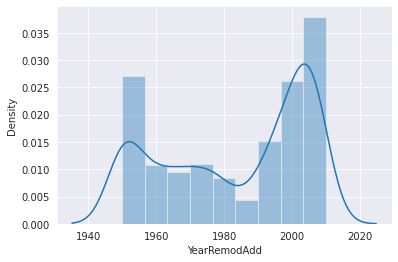

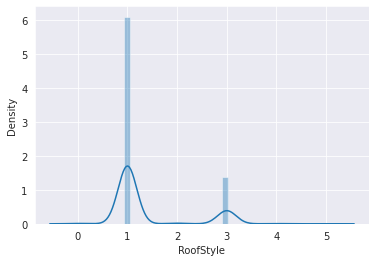

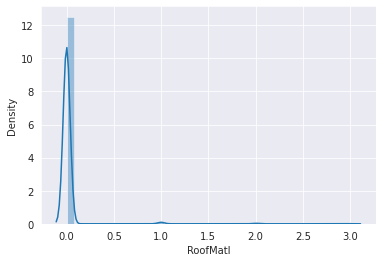

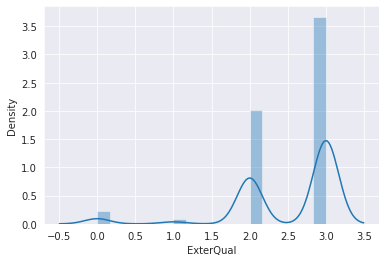

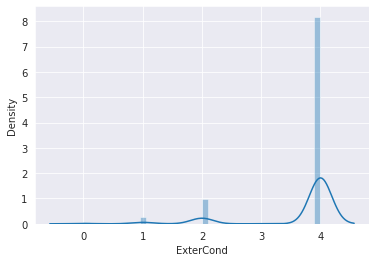

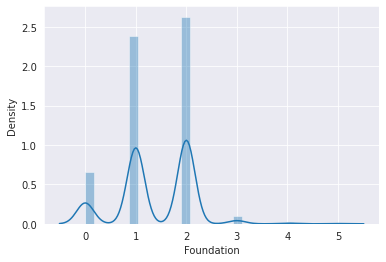

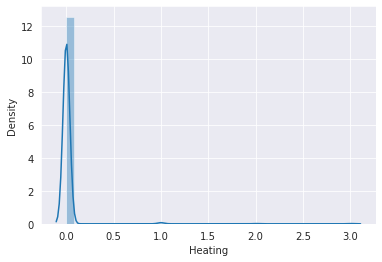

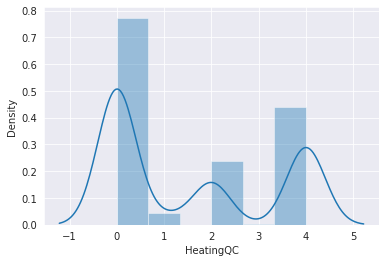

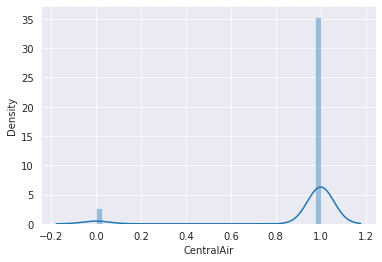

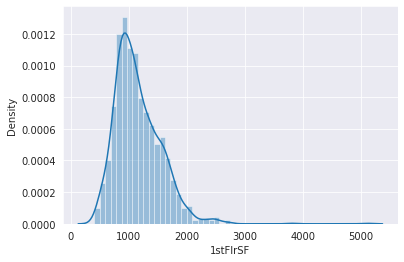

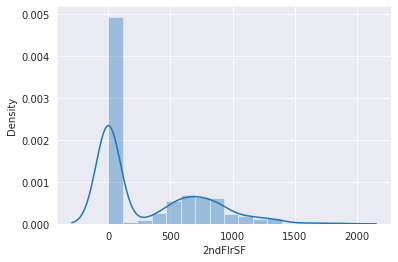

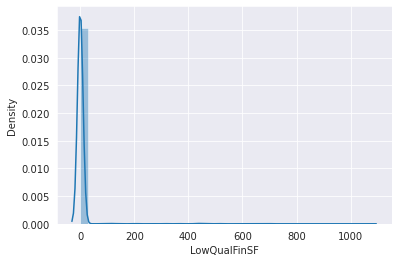

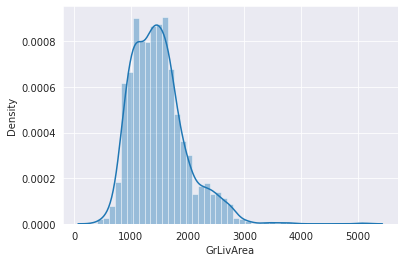

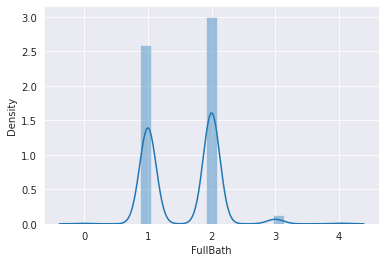

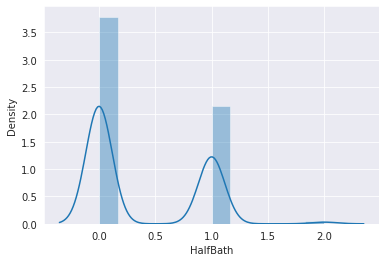

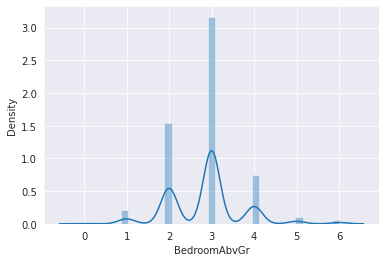

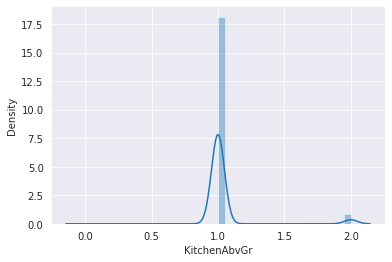

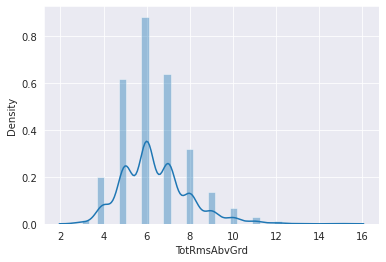

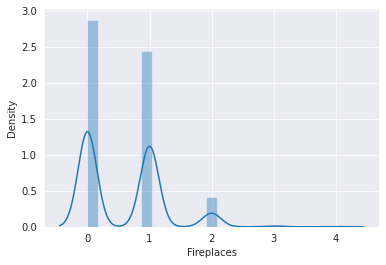

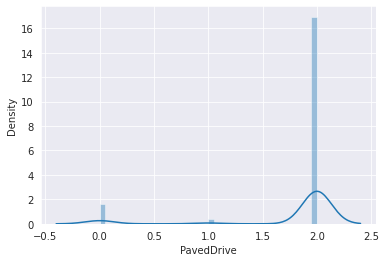

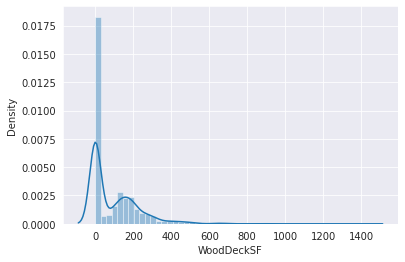

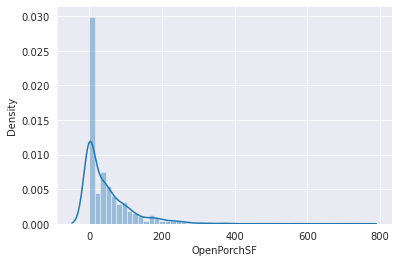

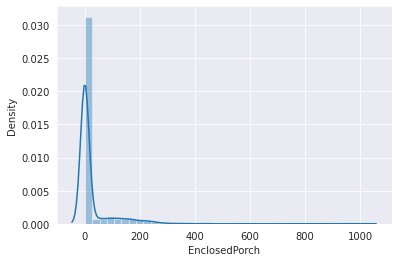

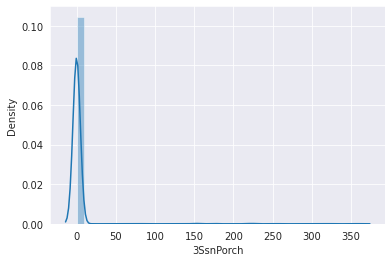

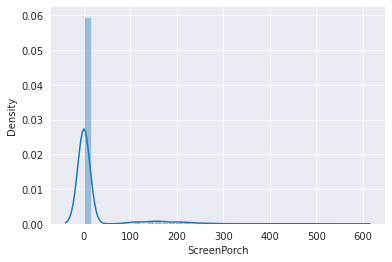

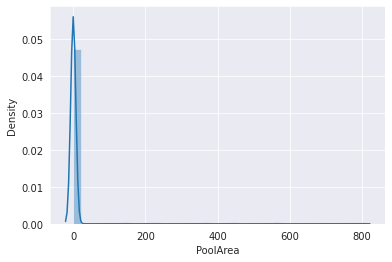

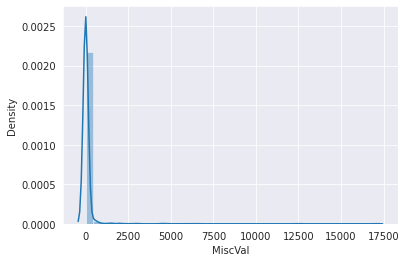

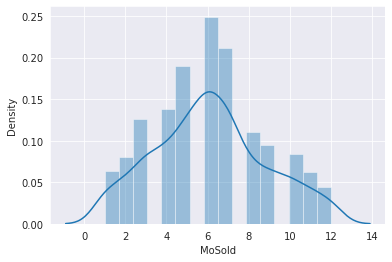

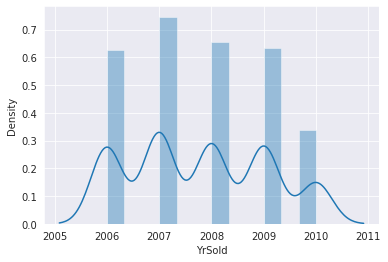

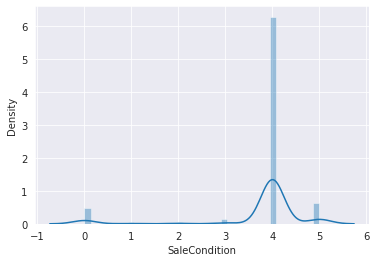

In [107]:
for i in range(0,46):
    name=test.columns[i]
    sns.distplot(test[name])
    plt.show()
    i+=1

이상치 확인

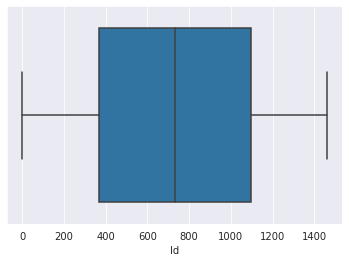

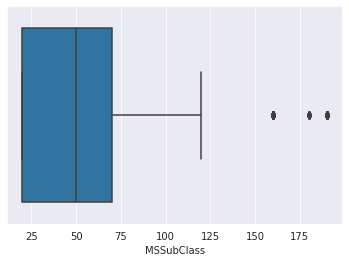

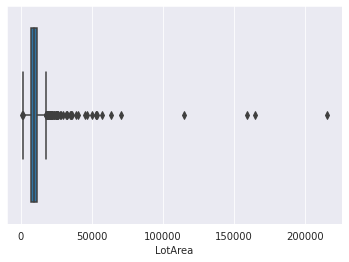

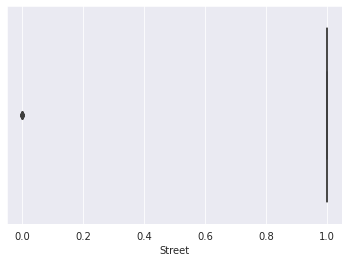

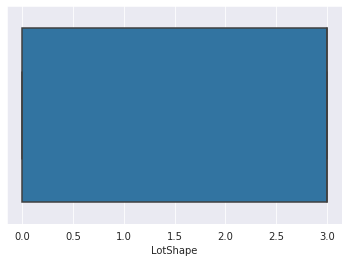

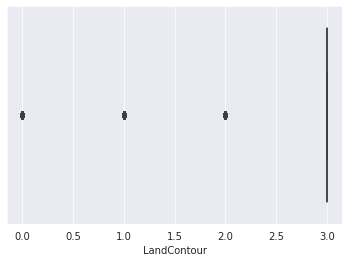

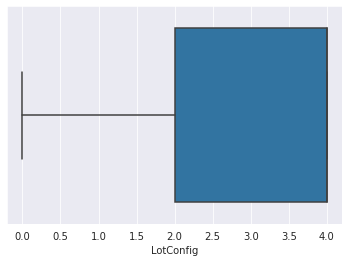

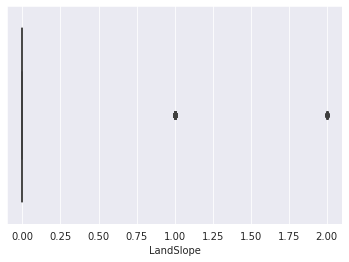

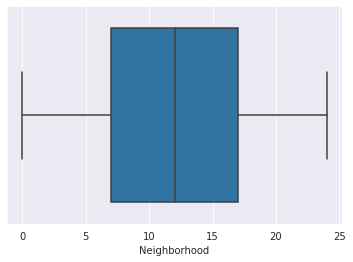

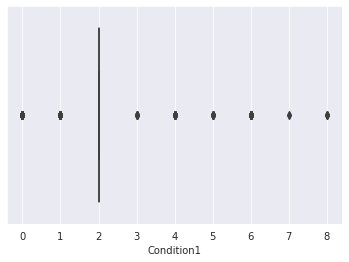

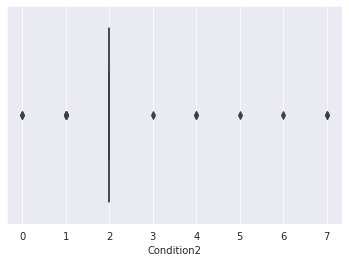

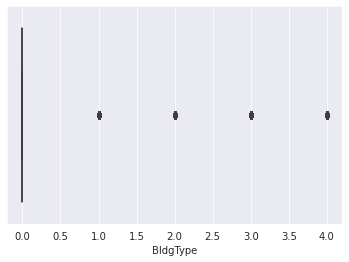

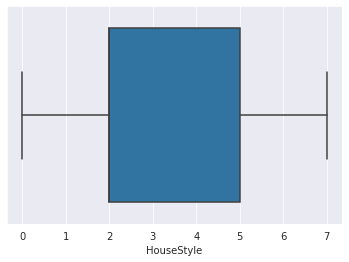

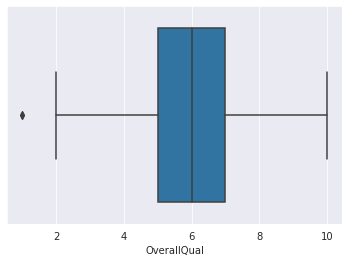

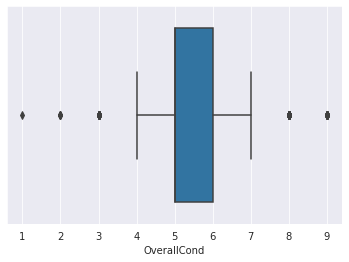

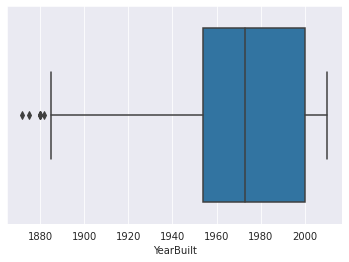

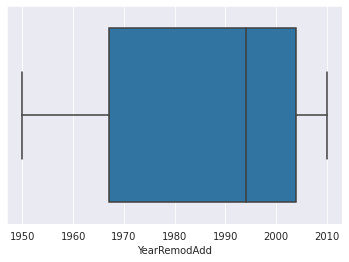

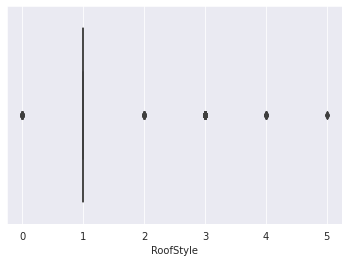

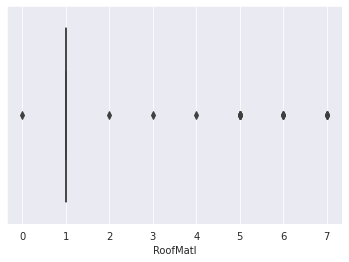

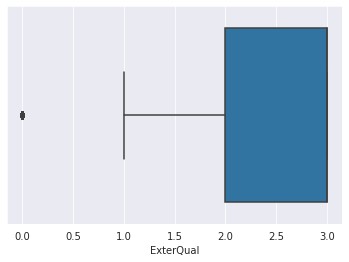

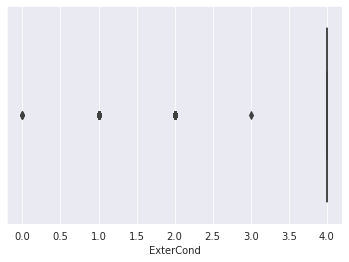

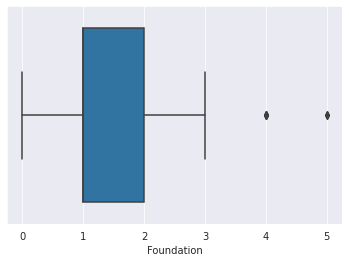

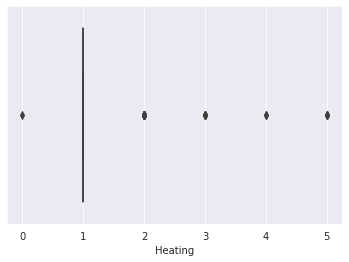

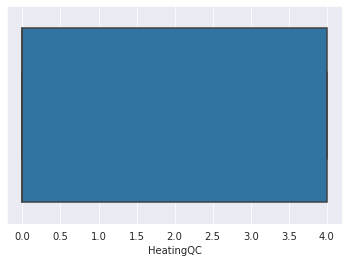

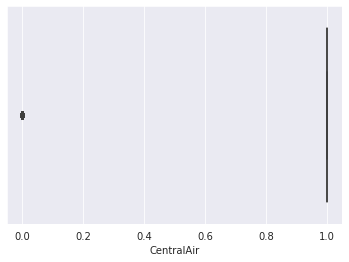

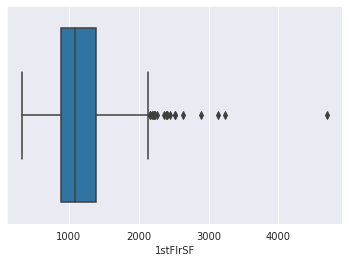

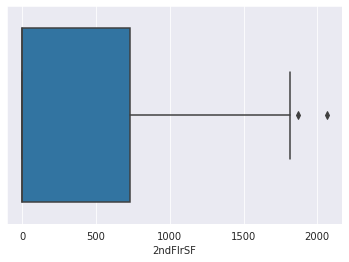

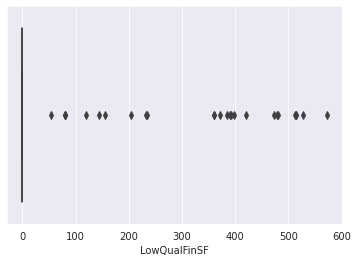

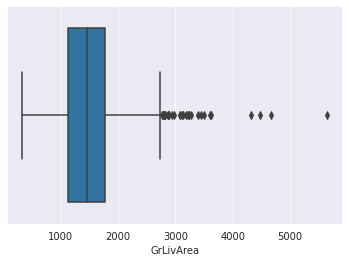

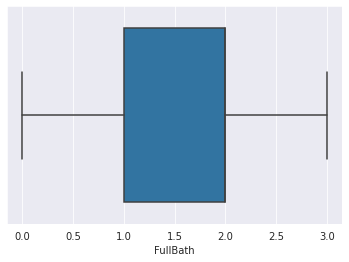

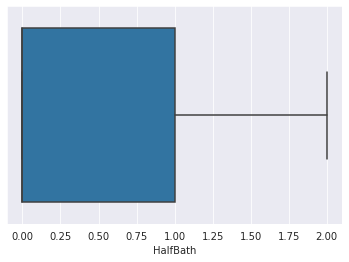

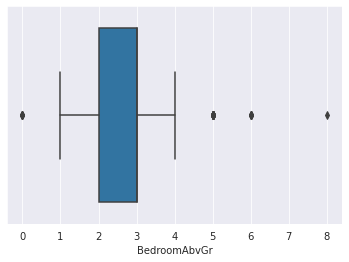

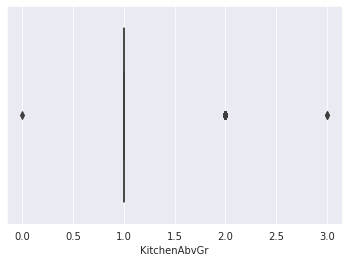

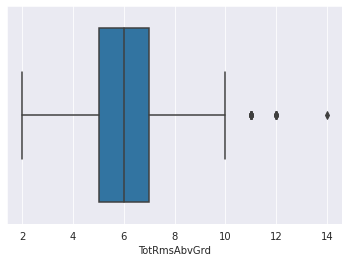

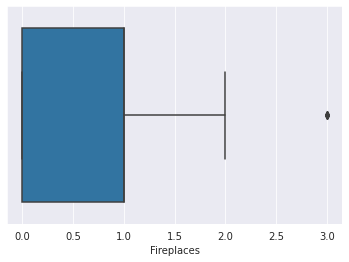

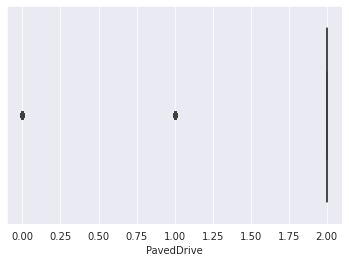

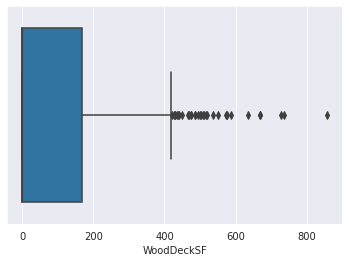

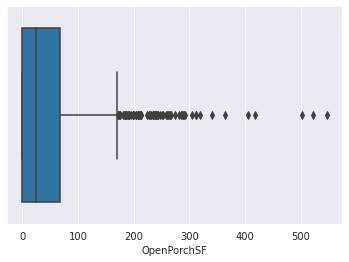

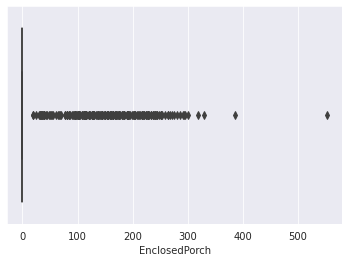

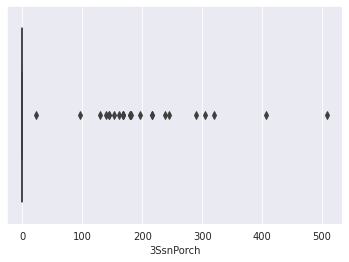

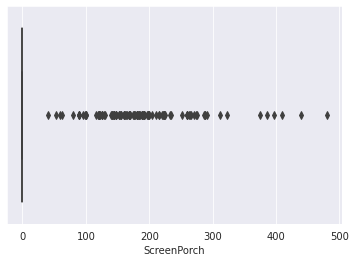

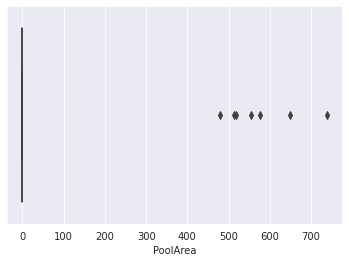

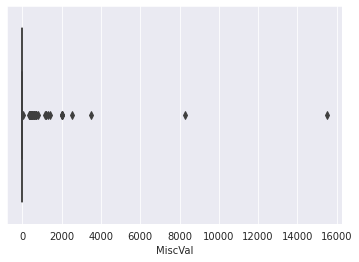

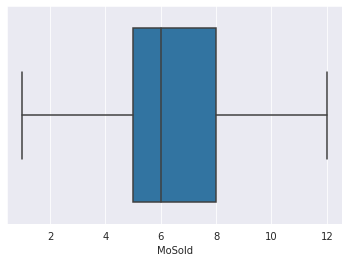

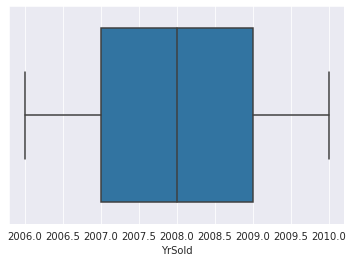

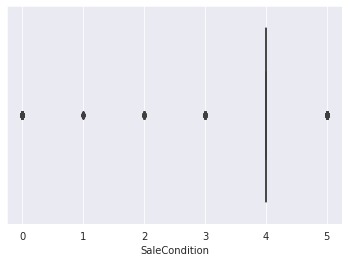

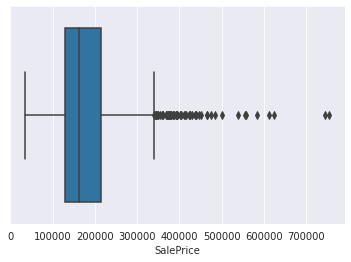

In [108]:
for i in range(0,47):
    name=train.columns[i]
    sns.boxplot(train[name])
    plt.show()
    i+=1

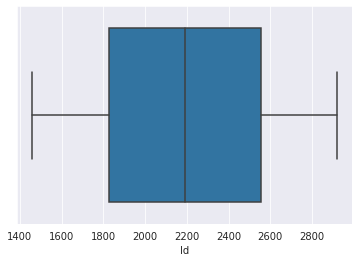

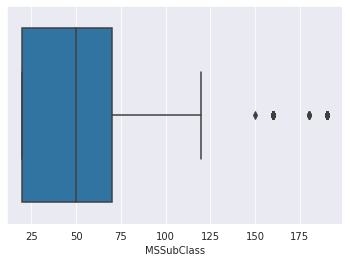

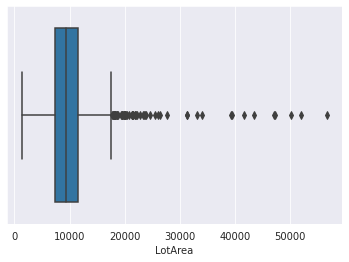

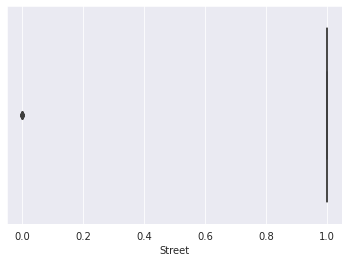

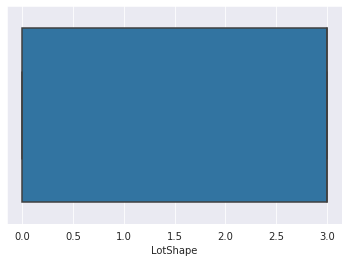

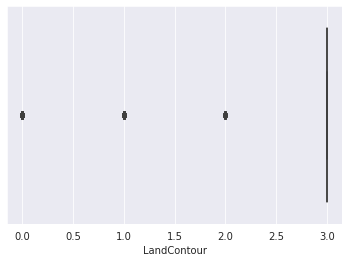

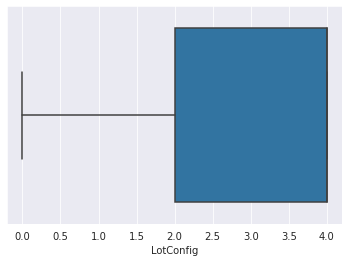

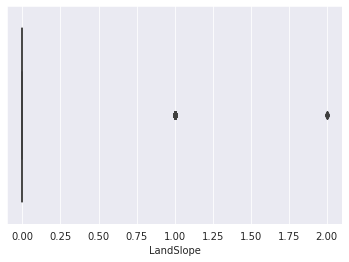

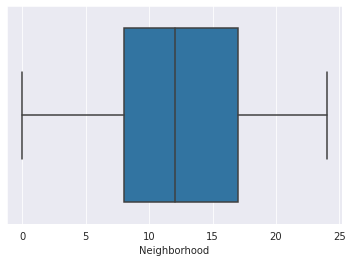

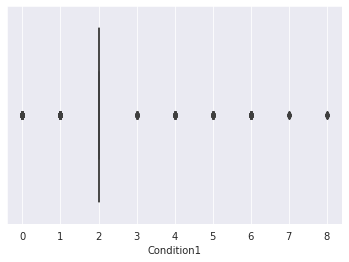

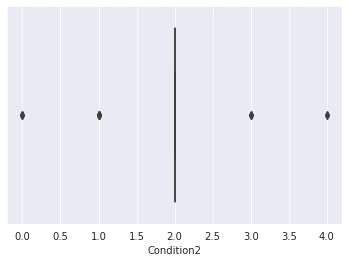

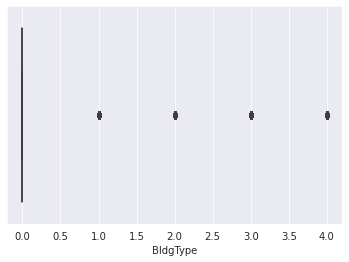

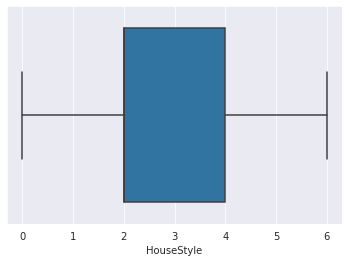

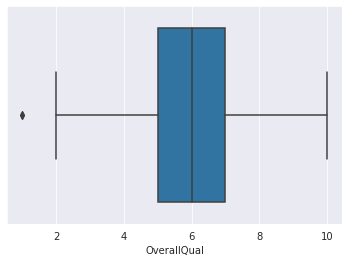

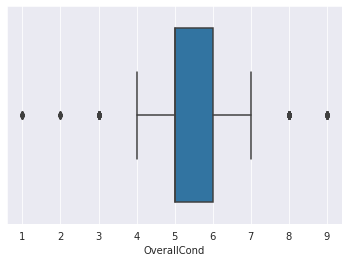

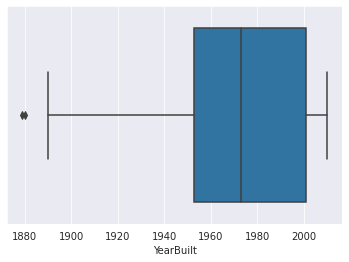

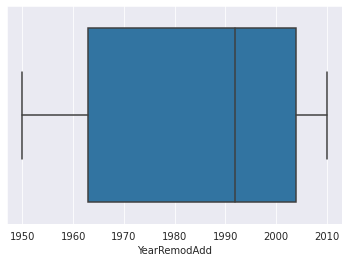

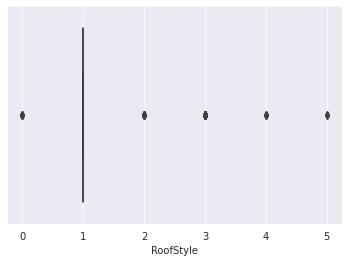

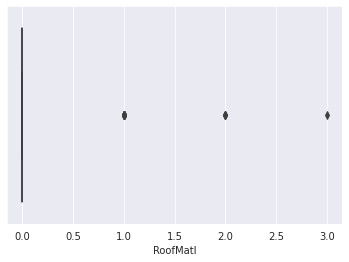

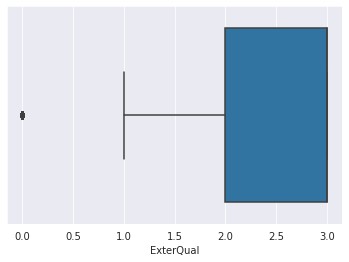

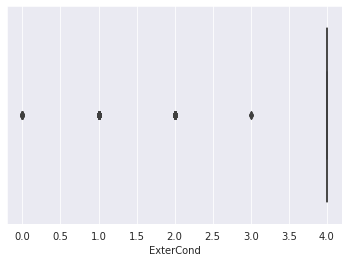

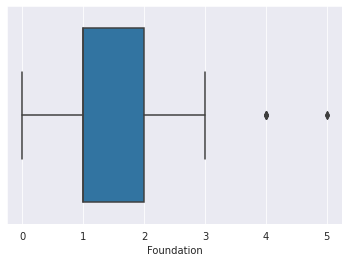

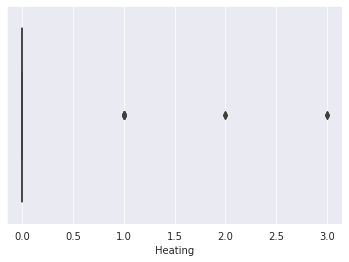

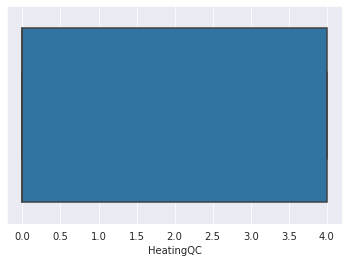

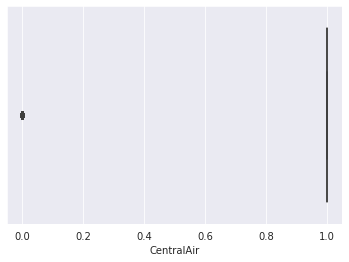

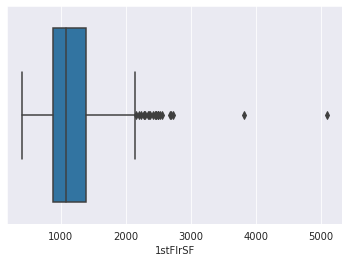

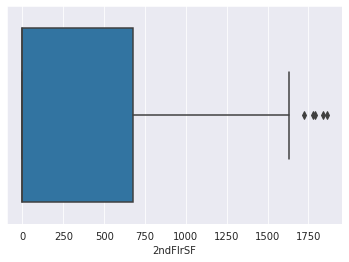

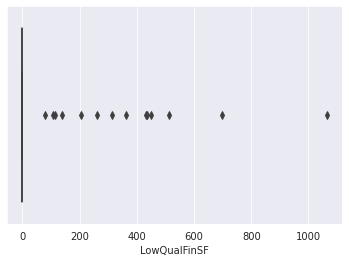

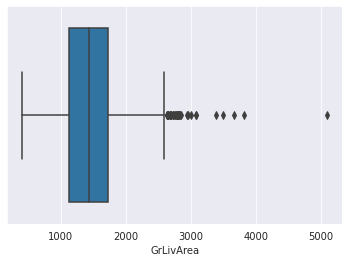

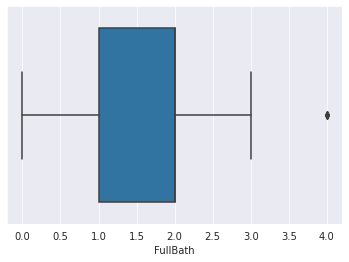

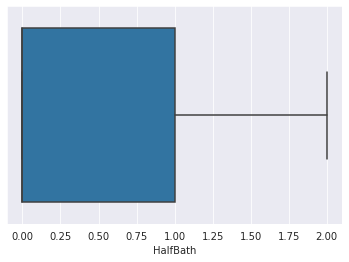

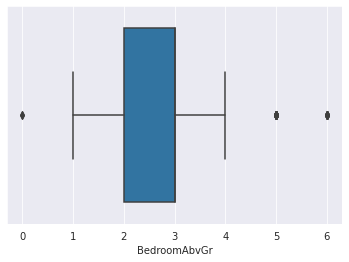

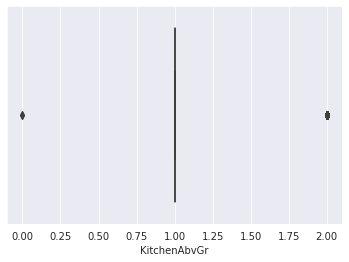

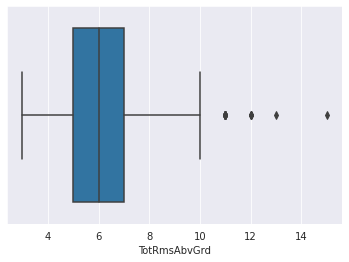

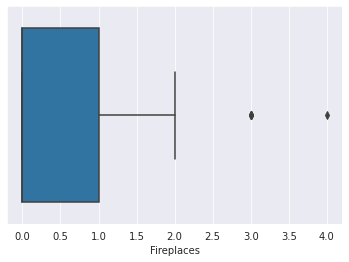

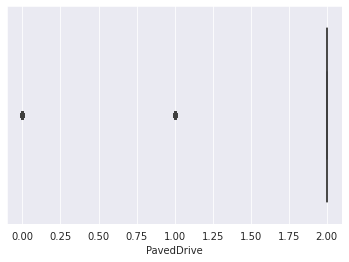

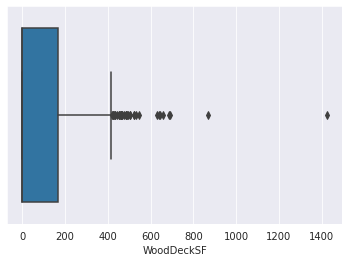

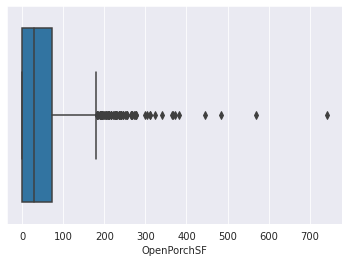

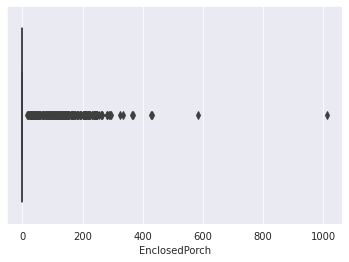

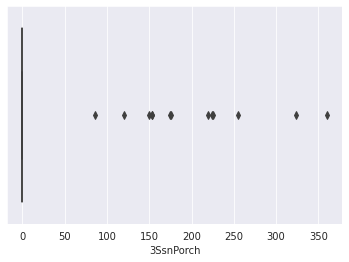

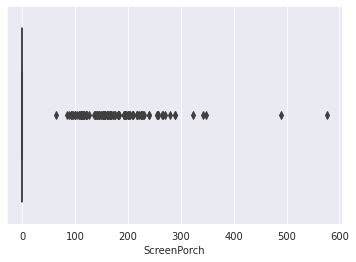

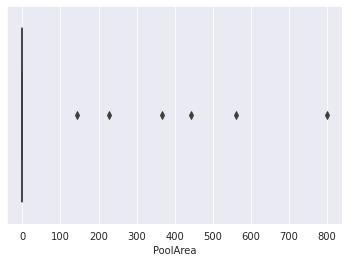

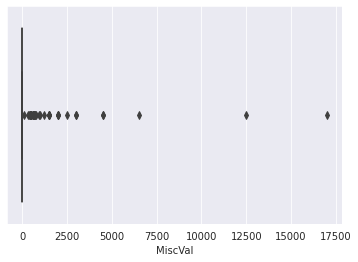

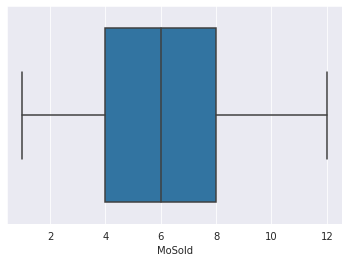

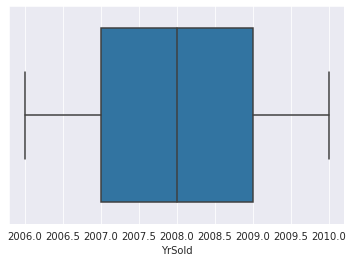

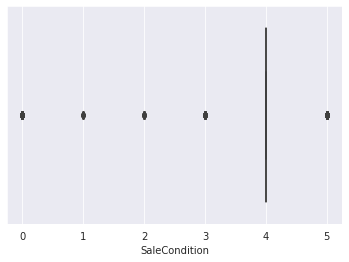

In [109]:
for i in range(0,46):
    name=test.columns[i]
    sns.boxplot(test[name])
    plt.show()
    i+=1

- 이상치를 제거해야 하는가?

종속 변수와 독립 변수들 상관관계 보기

In [111]:
import statsmodels.api as sm

In [112]:
import statsmodels.api as sm
x=train.drop(['SalePrice'], axis=1)
y=train[['SalePrice']]

x_constant=sm.add_constant(x)
model_1=sm.OLS(y,x_constant)
model_2=model_1.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     137.0
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:34:52   Log-Likelihood:                -17318.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1414   BIC:                         3.497e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.304e+06   1.43e+06      0.915      0.360   -1.49e+06     4.1e+06
Id               -1.5663      2.199     -0.712      0.477      -5.881       2.748
MSSubClass      -60.6967     48.286     -1.257      0.209    -155.416      34.022
LotArea           0.4430      0.114      3.876      0.000       0.219       0.667
Street         2.915e+04    1.5e+04      1.937      0.053    -367.097    5.87e+04
LotShape      -1126.7253    720.825     -1.563      0.118   -2540.726     287.276
LandContour    3081.1661   1455.227      2.117      0.034     226.529    5935.803
LotConfig         3.0403    592.995      0.005      0.996   -1160.204    1166.285
LandSlope      1.042e+04   4114.164      2.533      0.011    2352.564    1.85e+04
Neighborhood    619.2972    159.645      3.879      0.000     306.131     932.463
Condition1    -1055.0199   1098.010     -0.961      0.337   -3208.924    1098.884
Condition2    -8359.6903   3622.210     -2.308      0.021   -1.55e+04   -1254.206
BldgType      -3289.6456   1577.701     -2.085      0.037   -6384.531    -194.760
HouseStyle     -434.1180    682.725     -0.636      0.525   -1773.380     905.144
OverallQual    1.552e+04   1203.716     12.895      0.000    1.32e+04    1.79e+04
OverallCond    5388.5374   1076.664      5.005      0.000    3276.507    7500.568
YearBuilt       469.9214     74.032      6.348      0.000     324.697     615.146
YearRemodAdd     30.1388     68.927      0.437      0.662    -105.071     165.348
RoofStyle      2615.3964   1200.118      2.179      0.029     261.193    4969.600
RoofMatl       3398.2488   1623.851      2.093      0.037     212.833    6583.665
ExterQual     -1.719e+04   1940.357     -8.860      0.000    -2.1e+04   -1.34e+04
ExterCond       986.2470   1339.312      0.736      0.462   -1641.006    3613.500
Foundation      371.6868   1730.658      0.215      0.830   -3023.247    3766.621
Heating       -1179.2388   3466.927     -0.340      0.734   -7980.112    5621.635
HeatingQC      -904.4236    652.977     -1.385      0.166   -2185.331     376.483
CentralAir    -3488.7918   4801.452     -0.727      0.468   -1.29e+04    5929.944
1stFlrSF         37.1448      5.658      6.565      0.000      26.046      48.243
2ndFlrSF         19.5885      5.748      3.408      0.001       8.312      30.865
LowQualFinSF    -26.7873     14.972     -1.789      0.074     -56.158       2.583
GrLivArea        29.9459      5.720      5.235      0.000      18.725      41.166
FullBath       -312.4095   2786.937     -0.112      0.911   -5779.385    5154.566
HalfBath       -867.3467   2703.631     -0.321      0.748   -6170.905    4436.212
BedroomAbvGr  -8654.7217   1738.239     -4.979      0.000   -1.21e+04   -5244.917
KitchenAbvGr  -1.249e+04   5331.852     -2.342      0.019   -2.29e+04   -2029.636
TotRmsAbvGrd   3824.0384   1260.022      3.035   

In [113]:
print(f"변수의 갯수는 총 {len(train.columns)} 입니다.")

변수의 갯수는 총 47 입니다.


변수의 개수가 매우 많은 것을 볼 수 있다.  위의 통계 지표에서 볼 수 있듯이, 변수가 많으면서, p-value가 0.05보다 큰 변수들이 존재한다. 이는 다중공선성 문제를 야기할 수 있어, 모델의 해석력을 떨어뜨린다.

따라서, 적절한 변수 선택법을 진행해야 한다.

변수선택은 R studio를 통해 진행해보도록 한다.
--

In [114]:
train.to_csv("train.csv", encoding="UTF-8", index=False)

In [115]:
test.to_csv("test.csv", encoding="UTF-8", index=False)

#R studio를 통해  단계적 선택법을 진행했을 경우


단계적 선택법 칼럼

SalePrice ~ MSSubClass + LotArea + Street + LotShape + LandContour + 
    LandSlope + Neighborhood + Condition2 + BldgType + OverallQual + 
    OverallCond + YearBuilt + RoofStyle + RoofMatl + ExterQual + 
    HeatingQC + X1stFlrSF + X2ndFlrSF + BedroomAbvGr + KitchenAbvGr + 
    TotRmsAbvGrd + Fireplaces + WoodDeckSF + ScreenPorch + YrSold + 
    SaleCondition

In [121]:
train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [126]:
train=train[["MSSubClass","LotArea","Street","LotShape","LandContour","LandSlope", 
       "Neighborhood","Condition2","BldgType","OverallQual","OverallCond",  
       "YearBuilt","RoofStyle","RoofMatl","ExterQual","HeatingQC","1stFlrSF", 
       "2ndFlrSF", "BedroomAbvGr", "KitchenAbvGr",  "TotRmsAbvGrd",  "Fireplaces",  
       "WoodDeckSF", "ScreenPorch","YrSold","SaleCondition","SalePrice"]]

In [127]:
x=train.drop(['SalePrice'], axis=1)
y=train[['SalePrice']]

x_constant=sm.add_constant(x)
model_1=sm.OLS(y,x_constant)
model_2=model_1.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     238.9
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:41:12   Log-Likelihood:                -17322.
No. Observations:                1460   AIC:                         3.470e+04
Df Residuals:                    1433   BIC:                         3.484e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.125e+06   1.39e+06      0.809      0.419    -1.6e+06    3.85e+06
MSSubClass      -74.1916     42.249     -1.756      0.079    -157.068       8.684
LotArea           0.4386      0.112      3.907      0.000       0.218       0.659
Street         3.087e+04   1.49e+04      2.075      0.038    1690.196       6e+04
LotShape      -1047.7600    695.072     -1.507      0.132   -2411.228     315.708
LandContour    2908.3710   1425.874      2.040      0.042     111.347    5705.395
LandSlope      1.069e+04   4068.223      2.629      0.009    2714.437    1.87e+04
Neighborhood    615.7740    156.820      3.927      0.000     308.152     923.396
Condition2    -8582.2282   3546.572     -2.420      0.016   -1.55e+04   -1625.200
BldgType      -2943.7459   1451.592     -2.028      0.043   -5791.218     -96.274
OverallQual    1.569e+04   1174.401     13.356      0.000    1.34e+04     1.8e+04
OverallCond    5164.2525    928.409      5.562      0.000    3343.065    6985.440
YearBuilt       455.7284     46.396      9.823      0.000     364.718     546.739
RoofStyle      2465.0237   1166.182      2.114      0.035     177.418    4752.630
RoofMatl       3157.8403   1596.865      1.978      0.048      25.396    6290.285
ExterQual     -1.728e+04   1865.681     -9.263      0.000   -2.09e+04   -1.36e+04
HeatingQC     -1008.9095    621.303     -1.624      0.105   -2227.670     209.851
1stFlrSF         67.0615      4.403     15.232      0.000      58.425      75.698
2ndFlrSF         48.1389      4.113     11.705      0.000      40.072      56.206
BedroomAbvGr  -8758.4596   1691.717     -5.177      0.000   -1.21e+04   -5439.952
KitchenAbvGr  -1.195e+04   5087.506     -2.350      0.019   -2.19e+04   -1974.510
TotRmsAbvGrd   3757.8712   1218.757      3.083      0.002    1367.133    6148.609
Fireplaces     4434.5654   1736.929      2.553      0.011    1027.370    7841.761
WoodDeckSF       30.3668      7.888      3.850      0.000      14.894      45.840
ScreenPorch      59.1001     16.994      3.478      0.001      25.764      92.436
YrSold        -1022.5920    690.928     -1.480      0.139   -2377.931     332.747
SaleCondition  2788.8870    859.994      3.243      0.001    1101.904    4475.870
==============================================================================
Omnibus:                      529.438   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77158.771
Skew:                          -0.573   Prob(JB):                         0.00
Kurtosis:                      38.596   Cond. No.                     2.25e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+07. T

In [128]:
test=test[["MSSubClass","LotArea","Street","LotShape","LandContour","LandSlope", 
       "Neighborhood","Condition2","BldgType","OverallQual","OverallCond",  
       "YearBuilt","RoofStyle","RoofMatl","ExterQual","HeatingQC","1stFlrSF", 
       "2ndFlrSF", "BedroomAbvGr", "KitchenAbvGr",  "TotRmsAbvGrd",  "Fireplaces",  
       "WoodDeckSF", "ScreenPorch","YrSold","SaleCondition"]]

In [136]:
import numpy as np
import random

In [137]:
def random_color():
  color_map = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
               'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
               'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
               'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
               'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
               'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
               'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r',
               'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
               'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
               'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma']
  color = random.choice(color_map)
  print(color)
  return color

PuBu


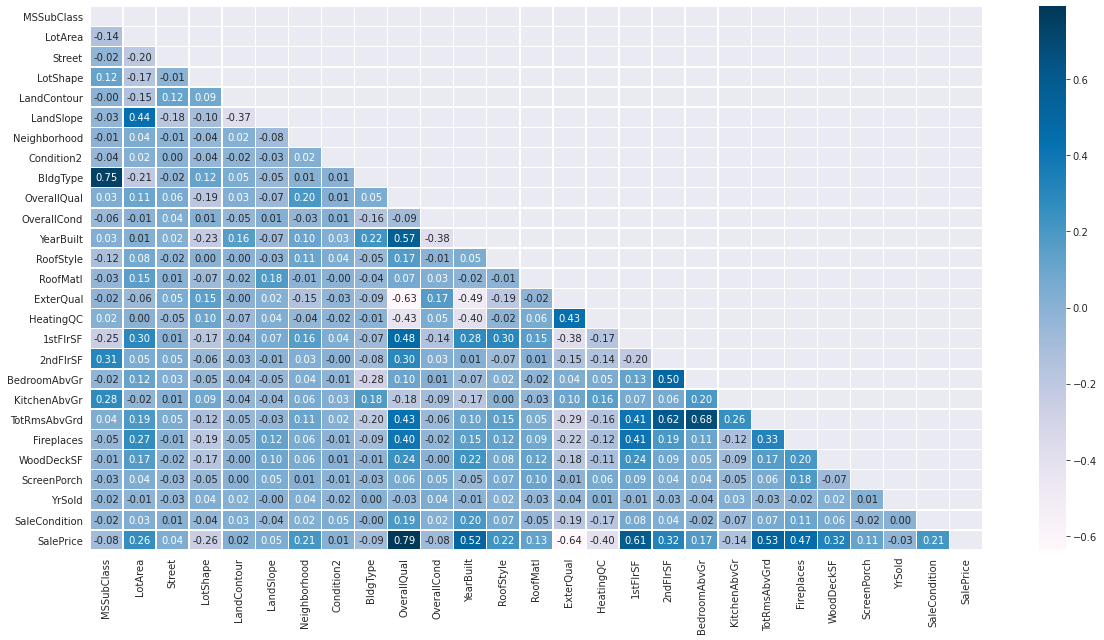

In [141]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=train.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap=random_color())

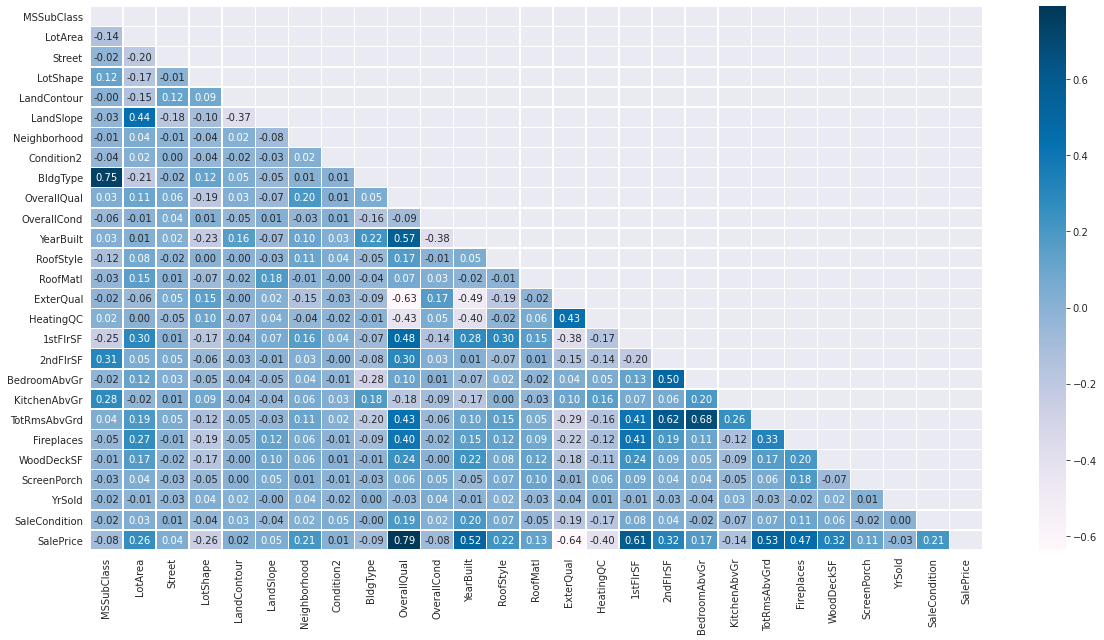

In [144]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=train.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='PuBu')

#Modeling

In [ ]:
!pip install catboost

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost
import lightgbm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import catboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [167]:
class regression_select:
    def smape(a, f):
        a=a.values
        a=a.reshape(1,-1)
        f=f.reshape(1,-1)
        score=(1/len(a))*(np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f)))*100)
        return score

    def linear(x_train,y_train, x_test, y_test):
        lr=LinearRegression()
        lr.fit(x_train, y_train)
        y_pred=lr.predict(x_test)
        train_score=lr.score(x_train, y_train)
        test_score=lr.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def ridge(x_train,y_train, x_test, y_test):
        ridge = Ridge()
        ridge.fit(x_train, y_train)
        y_pred=ridge.predict(x_test)
        train_score=ridge.score(x_train, y_train)
        test_score=ridge.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def lasso(x_train,y_train, x_test, y_test):
        lasso = Lasso()
        lasso.fit(x_train, y_train)
        y_pred=lasso.predict(x_test)
        train_score=lasso.score(x_train, y_train)
        test_score=lasso.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def elasticnet(x_train,y_train, x_test, y_test):
        en = ElasticNet()
        en.fit(x_train, y_train)
        y_pred=en.predict(x_test)
        train_score=en.score(x_train, y_train)
        test_score=en.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def xgboost(x_train,y_train, x_test, y_test):
        xgb = xgboost.XGBRegressor(random_state=42)
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        train_score=xgb.score(x_train, y_train)
        test_score=xgb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def lgbm(x_train,y_train, x_test, y_test):
         lgbm = lightgbm.LGBMRegressor(random_state=42)
         lgbm.fit(x_train, y_train)
         y_pred=lgbm.predict(x_test)
         train_score=lgbm.score(x_train, y_train)
         test_score=lgbm.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def ada(x_train,y_train, x_test, y_test):
         ada = AdaBoostRegressor(random_state=42)
         ada.fit(x_train, y_train)
         y_pred=ada.predict(x_test)
         train_score=ada.score(x_train, y_train)
         test_score=ada.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def gradient(x_train,y_train, x_test, y_test):
         gb = GradientBoostingRegressor(random_state=42)
         gb.fit(x_train, y_train)
         y_pred=gb.predict(x_test)
         train_score=gb.score(x_train, y_train)
         test_score=gb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def decision(x_train,y_train, x_test, y_test):
         dt =DecisionTreeRegressor(random_state=42)
         dt.fit(x_train, y_train)
         y_pred=dt.predict(x_test)
         train_score=dt.score(x_train, y_train)
         test_score=dt.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def randomforest(x_train,y_train, x_test, y_test):
         rf = RandomForestRegressor(random_state=42)
         rf.fit(x_train, y_train)
         y_pred=rf.predict(x_test)
         train_score=rf.score(x_train, y_train)
         test_score=rf.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    #def svr(x_train,y_train, x_test, y_test):
        # sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)
        # sv_regressor.fit(x_train, y_train)
        # y_pred=sv_regressor.predict(x_test)
        # train_score=sv_regressor.score(x_train, y_train)
        # test_score=sv_regressor.score(x_test, y_test)
        # mse=mean_squared_error(y_test, y_pred)
        # rmse=np.sqrt(mse)
        #y_test_1=pd.Series(y_test)
        #smape_score=regression_select.smape(y_test_1, y_pred)
        # return rmse, smape_score, train_score, test_score

    def catboost(x_train,y_train, x_test, y_test):
         cb = catboost.CatBoostRegressor(random_state=42)
         cb.fit(x_train, y_train)
         y_pred_train=cb.predict(x_train)
         train_score=r2_score(y_train, y_pred_train)
         y_pred=cb.predict(x_test)
         test_score=r2_score(y_test, y_pred)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

In [168]:
class regression_model:
    def model_choice(x_train,y_train, x_test, y_test):
        model=pd.DataFrame(columns=['모델','rmse','smape','train_score','test_score'])
        linear_rmse=regression_select.linear(x_train,y_train, x_test, y_test)[0]
        linear_smape=regression_select.linear(x_train,y_train, x_test, y_test)[1]
        linear_train_score=regression_select.linear(x_train,y_train, x_test, y_test)[2]
        linear_test_score=regression_select.linear(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'linear', 'rmse':linear_rmse,
                            'smape':linear_smape,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x_train,y_train, x_test, y_test)[0]
        ridge_smape=regression_select.ridge(x_train,y_train, x_test, y_test)[1]
        ridge_train_score=regression_select.ridge(x_train,y_train, x_test, y_test)[2]
        ridge_test_score=regression_select.ridge(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'ridge', 'rmse':ridge_rmse,
                            'smape':ridge_smape,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x_train,y_train, x_test, y_test)[0]
        lasso_smape=regression_select.lasso(x_train,y_train, x_test, y_test)[1]
        lasso_train_score=regression_select.lasso(x_train,y_train, x_test, y_test)[2]
        lasso_test_score=regression_select.lasso(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lasso', 'rmse':lasso_rmse,
                            'smape':lasso_smape,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x_train,y_train, x_test, y_test)[0]
        elasticnet_smape=regression_select.elasticnet(x_train,y_train, x_test, y_test)[1]
        elasticnet_train_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[2]
        elasticnet_test_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'elasticnet', 'rmse':elasticnet_rmse,
                            'smape':elasticnet_smape,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x_train,y_train, x_test, y_test)[0]
        xgboost_smape=regression_select.xgboost(x_train,y_train, x_test, y_test)[1]
        xgboost_train_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[2]
        xgboost_test_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'smape':xgboost_smape,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
    

        lgbm_rmse=regression_select.lgbm(x_train,y_train, x_test, y_test)[0]
        lgbm_smape=regression_select.lgbm(x_train,y_train, x_test, y_test)[1]
        lgbm_train_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[2]
        lgbm_test_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lightgbm', 'rmse':lgbm_rmse,
                            'smape':lgbm_smape,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)

        ada_rmse=regression_select.ada(x_train,y_train, x_test, y_test)[0]
        ada_smape=regression_select.ada(x_train,y_train, x_test, y_test)[1]
        ada_train_score=regression_select.ada(x_train,y_train, x_test, y_test)[2]
        ada_test_score=regression_select.ada(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'ada', 'rmse':ada_rmse,
                            'smape':ada_smape,
                            'train_score':ada_train_score,
                            'test_score':ada_test_score}, ignore_index=True)
        
        gradient_rmse=regression_select.gradient(x_train,y_train, x_test, y_test)[0]
        gradient_smape=regression_select.gradient(x_train,y_train, x_test, y_test)[1]
        gradient_train_score=regression_select.gradient(x_train,y_train, x_test, y_test)[2]
        gradient_test_score=regression_select.gradient(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'gradient', 'rmse':gradient_rmse,
                            'smape':gradient_smape,
                            'train_score':gradient_train_score,
                            'test_score':gradient_test_score}, ignore_index=True)
        
        decision_rmse=regression_select.decision(x_train,y_train, x_test, y_test)[0]
        decision_smape=regression_select.decision(x_train,y_train, x_test, y_test)[1]
        decision_train_score=regression_select.decision(x_train,y_train, x_test, y_test)[2]
        decision_test_score=regression_select.decision(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'decision', 'rmse':decision_rmse,
                            'smape':decision_smape,
                            'train_score':decision_train_score,
                            'test_score':decision_test_score}, ignore_index=True)

        randomforest_rmse=regression_select.randomforest(x_train,y_train, x_test, y_test)[0]
        randomforest_smape=regression_select.randomforest(x_train,y_train, x_test, y_test)[1]
        randomforest_train_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[2]
        randomforest_test_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'randomforest', 'rmse':randomforest_rmse,
                            'smape':randomforest_smape,
                            'train_score':randomforest_train_score,
                            'test_score':randomforest_test_score}, ignore_index=True)
        
        #svr_rmse=regression_select.svr(x_train,y_train, x_test, y_test)[0]
        #svr_smape=regression_select.svr(x_train,y_train, x_test, y_test)[1]
        #svr_train_score=regression_select.svr(x_train,y_train, x_test, y_test)[2]
        #svr_test_score=regression_select.svr(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'svr', 'rmse':svr_rmse,
        #                     'smape':svr_smape
         #                   'train_score':svr_train_score,
         #                   'test_score':svr_test_score}, ignore_index=True)
        

        catboost_rmse=regression_select.catboost(x_train,y_train, x_test, y_test)[0]
        catboost_smape=regression_select.catboost(x_train,y_train, x_test, y_test)[1]
        catboost_train_score=regression_select.catboost(x_train,y_train, x_test, y_test)[2]
        catboost_test_score=regression_select.catboost(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
                            'smape':catboost_smape,
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [169]:
x=train.drop('SalePrice', axis=1)
y=train[['SalePrice']]

In [170]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model_choice=regression_model.model_choice(x_train, y_train, x_test, y_test)

In [172]:
model_choice

,모델,rmse,smape,train_score,test_score
10,catboost,27654.695111,2810.590167,0.988361,0.900293
4,xgboost,27714.327091,3020.909703,0.941661,0.899863
7,gradient,28741.860595,3092.463013,0.946290,0.892300
9,randomforest,29959.047613,3094.957318,0.979053,0.882985
5,lightgbm,31638.543614,3073.363012,0.964965,0.869497
0,linear,35922.753285,3769.063794,0.803914,0.831761
2,lasso,35923.543370,3768.478611,0.803914,0.831754
1,ridge,35929.981246,3761.526176,0.803900,0.831694
8,decision,36575.112155,4430.043323,0.999995,0.825596
6,ada,37088.806083,4520.860875,0.841487,0.820662


Cat Boost만 따로 다시 돌리기

In [ ]:
cb = catboost.CatBoostRegressor(random_state=42)
cb.fit(x_train, y_train)
y_pred=cb.predict(x_test)

In [158]:
print(f"catboost test score는 {r2_score(y_test, y_pred)}입니다.")

catboost test score는 0.9002933980894867입니다.


In [ ]:
cb = catboost.CatBoostRegressor(random_state=42)
cb.fit(x_train, y_train)
y_pred_train=cb.predict(x_train)

In [161]:
print(f"catboost train score는 {r2_score(y_train, y_pred_train)}입니다.")

catboost train score는 0.9883610048617429입니다.


SHAP
--

마무리로 모델 해석 

In [ ]:
!pip install shap

In [174]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/shap-0.26.0-py2.7-macosx-10.9-x86_64.egg')
import shap

In [176]:
def cb_shap_summary(x_train,y_train,x_test,y_test):
    cb = catboost.CatBoostRegressor()
    cb.fit(x_train, y_train)
    y_pred_train=cb.predict(x_train)
    y_pred=cb.predict(x_test)
    train_score=r2_score(y_train, y_pred_train)
    test_score=r2_score(y_test, y_pred)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    explainer = shap.TreeExplainer(cb)
    shap_values = explainer.shap_values(x)
    plt.rcParams['font.family'] = 'NanumGothic'
    shap.summary_plot(shap_values, x)
    plt.show()

In [177]:
def cb_shap_plot(x_train,y_train,x_test,y_test):
    cb = catboost.CatBoostRegressor()
    cb.fit(x_train, y_train)
    y_pred_train=cb.predict(x_train)
    y_pred=cb.predict(x_test)
    train_score=r2_score(y_train, y_pred_train)
    test_score=r2_score(y_test, y_pred)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    explainer = shap.TreeExplainer(cb)
    shap_values = explainer.shap_values(x)
    plt.rcParams['font.family'] = 'NanumGothic'
    shap.summary_plot(shap_values, x, plot_type="bar")
    plt.show()

In [ ]:
cb_shap_summary(x_train, y_train, x_test, y_test)

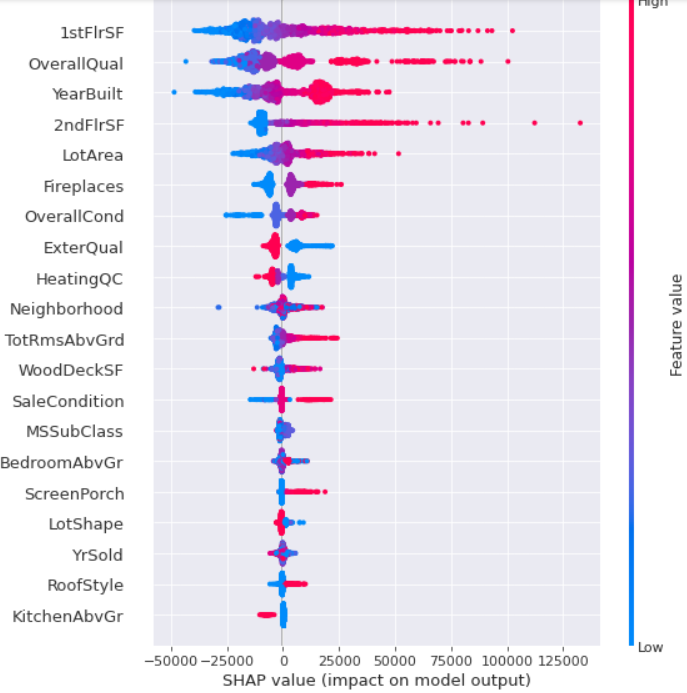

In [ ]:
cb_shap_plot(x_train, y_train, x_test, y_test)

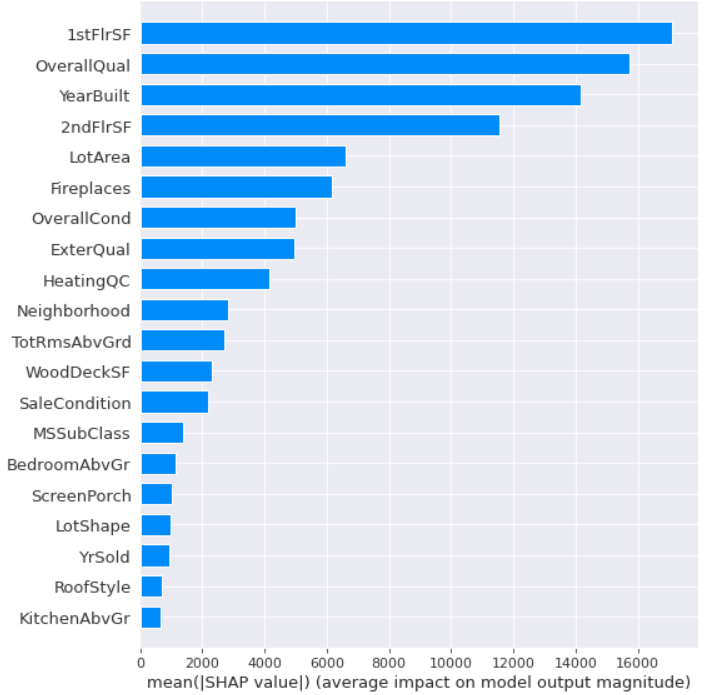

In [184]:
y_final_pred=cb.predict(test)

In [185]:
y_final_pred

array([127528.27671592, 155124.00974972, 176853.0760723 , ...,
       163159.34344534, 141596.73201227, 221009.8988408 ])

In [189]:
sub=pd.DataFrame(y_final_pred, columns=['SalePrice'])

In [192]:
sample_submission.drop('SalePrice', axis=1, inplace=True)

In [194]:
sample_submission=pd.concat([sample_submission, sub], axis=1)

In [195]:
sample_submission

,Id,SalePrice
0,1461,127528.276716
1,1462,155124.009750
2,1463,176853.076072
3,1464,192945.634211
4,1465,207134.909512
...,...,...
1454,2915,97122.835597
1455,2916,86182.371187
1456,2917,163159.343445
1457,2918,141596.732012


In [196]:
sample_submission.to_csv("sample_submission.csv", index=False)